<a href="https://colab.research.google.com/github/phornpailinn/ML/blob/main/6610412006_Phornpailin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [2]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Step 1: Import Libraries

In [17]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4496    0  4496    0     0  16793      0 --:--:-- --:--:-- --:--:-- 16838
100  517k  100  517k    0     0  1037k      0 --:--:-- --:--:-- --:--:-- 1037k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4500    0  4500    0     0  24844      0 --:--:-- --:--:-- --:--:-- 25000
100  392k  100  392k    0     0  1131k      0 --:--:-- --:--:-- --:--:-- 5166k


In [8]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Step 2: Import Data

In [22]:
gulf = yf.Ticker('gulf.bk')
interval = '1h'
start = '2023-1-1'
end = '2023-6-30'
df = gulf.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,55.25,55.75,55.25,55.50,0,0.0,0.0
2023-01-03 11:00:00+07:00,55.50,55.75,55.25,55.25,1048212,0.0,0.0
2023-01-03 12:00:00+07:00,55.25,55.50,55.25,55.25,1068086,0.0,0.0
2023-01-03 14:00:00+07:00,55.25,55.50,55.25,55.25,108732,0.0,0.0
2023-01-03 15:00:00+07:00,55.25,55.50,55.25,55.25,164109,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-29 11:00:00+07:00,44.25,46.00,44.25,45.00,9389275,0.0,0.0
2023-06-29 12:00:00+07:00,45.00,45.50,45.00,45.25,1010836,0.0,0.0
2023-06-29 14:00:00+07:00,45.25,45.75,45.00,45.50,3700197,0.0,0.0


Step 3: Define Predictor/Independent Variables

In [23]:
import talib as ta
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

Step 4: Define Target/Dependent Variable

In [24]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

Step 5: Split The Dataset

In [25]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

Step 6: Instantiate The Logistic Regression in Python

In [26]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

Step 7: Examine The Coefficients

In [27]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-7.345529676603301e-11]
1,High,[-7.375243939343336e-11]
2,Low,[-7.31575074317036e-11]
3,Close,[-7.381613241368856e-11]
4,Volume,[-1.8579264384490015e-07]
5,Dividends,[-6.906230528269953e-15]
6,Stock Splits,[0.0]
7,S_10,[-7.348712392753871e-11]
8,Corr,[-3.051038967170281e-13]


Step 8: Calculate Class Probabilities

In [29]:
# Specify the date for prediction
prediction_date = '2023-02-20'
probability = model.predict_proba(X_test)
print(probability)

[[0.68973695 0.31026305]
 [0.5        0.5       ]
 [0.54995959 0.45004041]
 [0.5066417  0.4933583 ]
 [0.5511549  0.4488451 ]
 [0.5636628  0.4363372 ]
 [0.5185197  0.4814803 ]
 [0.5        0.5       ]
 [0.53240816 0.46759184]
 [0.5492885  0.4507115 ]
 [0.51713684 0.48286316]
 [0.61285971 0.38714029]
 [0.56291065 0.43708935]
 [0.99767458 0.00232542]
 [0.75296244 0.24703756]
 [0.64948373 0.35051627]
 [0.76957866 0.23042134]
 [0.82821058 0.17178942]
 [0.82269067 0.17730933]
 [0.5        0.5       ]
 [0.68376632 0.31623368]
 [0.58707614 0.41292386]
 [0.79656715 0.20343285]
 [0.80035786 0.19964214]
 [0.67376009 0.32623991]
 [0.92000829 0.07999171]
 [0.84886633 0.15113367]
 [0.57385741 0.42614259]
 [0.67307093 0.32692907]
 [0.72667866 0.27332134]
 [0.6688529  0.3311471 ]
 [0.5        0.5       ]
 [0.62633026 0.37366974]
 [0.58270897 0.41729103]
 [0.5698158  0.4301842 ]
 [0.80382512 0.19617488]
 [0.57655505 0.42344495]
 [0.5        0.5       ]
 [0.723801   0.276199  ]
 [0.52177533 0.47822467]


Step 9: Predict Class Labels

In [30]:
predicted = model.predict(X_test)

In [31]:
print (predicted)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [33]:
df_test_predicted = X_test.copy()
df_test_predicted['Predicted'] = predicted
buying_dates = df_test_predicted[df_test_predicted['Predicted'] == 1].index
print(buying_dates)

DatetimeIndex([], dtype='datetime64[ns, Asia/Bangkok]', name='Datetime', freq=None)


In [34]:
print(metrics.confusion_matrix(y_test, predicted))

[[151   0]
 [ 60   0]]


Step 10: Evaluate The Model

In [35]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.72      1.00      0.83       151
           1       0.00      0.00      0.00        60

    accuracy                           0.72       211
   macro avg       0.36      0.50      0.42       211
weighted avg       0.51      0.72      0.60       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 11: Create Trading Strategy Using The Model

<ipython-input-36-c3bcd586cd1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-36-c3bcd586cd1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gulf_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-36-c3bcd586cd1c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

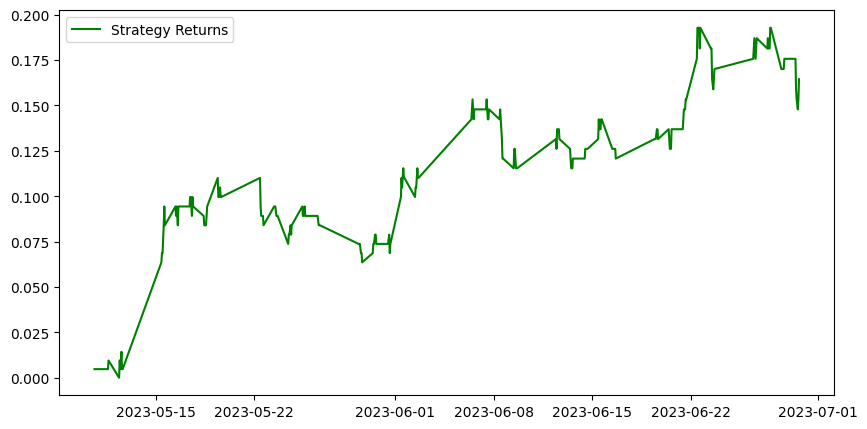

In [36]:
df['Predicted_Signal'] = model.predict(X)
df['gulf_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_gulf_returns = np.cumsum(df[split:]['gulf_returns'])


df['Strategy_returns'] = df['gulf_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

Add column

In [69]:
gulf = yf.Ticker('gulf.bk')
interval = '1h'
start = '2023-1-01'
end = '2023-6-30'
df = gulf.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,55.25,55.75,55.25,55.50,0,0.0,0.0
2023-01-03 11:00:00+07:00,55.50,55.75,55.25,55.25,1048212,0.0,0.0
2023-01-03 12:00:00+07:00,55.25,55.50,55.25,55.25,1068086,0.0,0.0
2023-01-03 14:00:00+07:00,55.25,55.50,55.25,55.25,108732,0.0,0.0
2023-01-03 15:00:00+07:00,55.25,55.50,55.25,55.25,164109,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-29 11:00:00+07:00,44.25,46.00,44.25,45.00,9389275,0.0,0.0
2023-06-29 12:00:00+07:00,45.00,45.50,45.00,45.25,1010836,0.0,0.0
2023-06-29 14:00:00+07:00,45.25,45.75,45.00,45.50,3700197,0.0,0.0


In [70]:
#import data ttw
ttw= yf.Ticker('ttw.bk')
interval = '1h'
start = '2023-1-01'
end = '2023-6-30'
dff = ttw.history(interval=interval,start=start,end=end)
dff


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,9.05,9.05,9.00,9.00,0,0.0,0.0
2023-01-03 11:00:00+07:00,9.00,9.05,9.00,9.05,74962,0.0,0.0
2023-01-03 12:00:00+07:00,9.00,9.05,9.00,9.00,19272,0.0,0.0
2023-01-03 14:00:00+07:00,9.05,9.05,9.00,9.00,55100,0.0,0.0
2023-01-03 15:00:00+07:00,9.00,9.05,9.00,9.00,756913,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-29 11:00:00+07:00,8.45,8.50,8.40,8.45,651452,0.0,0.0
2023-06-29 12:00:00+07:00,8.45,8.45,8.45,8.45,48600,0.0,0.0
2023-06-29 14:00:00+07:00,8.45,8.50,8.45,8.45,159213,0.0,0.0


In [71]:
df2 = df.copy()
df['ttw_close'] = dff.Close
df2.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,55.25,55.75,55.25,55.50,0,0.0,0.0
2023-01-03 11:00:00+07:00,55.50,55.75,55.25,55.25,1048212,0.0,0.0
2023-01-03 12:00:00+07:00,55.25,55.50,55.25,55.25,1068086,0.0,0.0
2023-01-03 14:00:00+07:00,55.25,55.50,55.25,55.25,108732,0.0,0.0
2023-01-03 15:00:00+07:00,55.25,55.50,55.25,55.25,164109,0.0,0.0
2023-01-03 16:00:00+07:00,55.25,55.50,55.25,55.25,1543001,0.0,0.0
2023-01-04 10:00:00+07:00,54.75,55.25,54.75,55.25,0,0.0,0.0
2023-01-04 11:00:00+07:00,55.25,55.75,55.00,55.50,3350762,0.0,0.0
2023-01-04 12:00:00+07:00,55.75,55.75,55.25,55.50,1708547,0.0,0.0


Define Predictor/Independent Variables

In [76]:
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI'] = ta.RSI(np.array(df2['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
X2 = df2.iloc[:,:10]
X2


,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI
Datetime,,,,,,,,,,
2023-01-11 10:00:00+07:00,55.00,55.25,55.00,55.00,0,0.0,0.0,55.125,0.418380,43.633798
2023-01-11 11:00:00+07:00,55.00,55.25,55.00,55.00,1033348,0.0,0.0,55.125,0.661659,43.633798
2023-01-11 12:00:00+07:00,55.00,55.25,55.00,55.25,266722,0.0,0.0,55.150,0.832250,50.468216
2023-01-11 14:00:00+07:00,55.25,55.25,55.00,55.00,461076,0.0,0.0,55.100,0.753497,44.476261
2023-01-11 15:00:00+07:00,55.00,55.25,55.00,55.00,1268611,0.0,0.0,55.050,0.477165,44.476261
...,...,...,...,...,...,...,...,...,...,...
2023-06-29 11:00:00+07:00,44.25,46.00,44.25,45.00,9389275,0.0,0.0,44.275,0.649836,65.330009
2023-06-29 12:00:00+07:00,45.00,45.50,45.00,45.25,1010836,0.0,0.0,44.450,0.751787,68.798083
2023-06-29 14:00:00+07:00,45.25,45.75,45.00,45.50,3700197,0.0,0.0,44.650,0.826876,71.919146


Define Target/Dependent Variable

In [77]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [78]:
# Split the data into training and testing sets
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

print('X_train size:',X_train.shape)
print('y_train size:',y_train.shape)
print('X_test size:',X_test.shape)
print('y_test size:',y_test.shape)

X_train size: (503, 9)
y_train size: (503,)
X_test size: (199, 9)
y_test size: (217,)


In [75]:
# Instantiate the logistic regression
model = LogisticRegression()
model = model.fit (X_train,y_train)

Examine The Coefficients

In [63]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-3.760699559575646e-11]
1,High,[-3.775789530916824e-11]
2,Low,[-3.743708224497887e-11]
3,Close,[-3.762655952264989e-11]
4,Volume,[-1.7359515355526891e-07]
5,Dividends,[-3.1366578541747568e-15]
6,Stock Splits,[0.0]
7,S_10,[-3.7573326368777286e-11]
8,Corr,[-1.797976122768421e-13]


Calculate Class Probabilities

In [64]:
# Calculate Class Probabilities : Specify the date for prediction
prediction_date = '2023-02-20'
probability = model.predict_proba(X_test)
print(probability)

[[0.55882004 0.44117996]
 [0.99654193 0.00345807]
 [0.73910239 0.26089761]
 [0.64021075 0.35978925]
 [0.75524098 0.24475902]
 [0.81301619 0.18698381]
 [0.80751303 0.19248697]
 [0.5        0.5       ]
 [0.67271908 0.32728092]
 [0.58146475 0.41853525]
 [0.78165948 0.21834052]
 [0.78539267 0.21460733]
 [0.66320912 0.33679088]
 [0.90738448 0.09261552]
 [0.83374994 0.16625006]
 [0.56907268 0.43092732]
 [0.66255484 0.33744516]
 [0.71374447 0.28625553]
 [0.65855213 0.34144787]
 [0.5        0.5       ]
 [0.61836076 0.38163924]
 [0.57736916 0.42263084]
 [0.56528641 0.43471359]
 [0.78881254 0.21118746]
 [0.57160053 0.42839947]
 [0.5        0.5       ]
 [0.7109797  0.2890203 ]
 [0.52034739 0.47965261]
 [0.62357901 0.37642099]
 [0.7047883  0.2952117 ]
 [0.57210546 0.42789454]
 [0.5        0.5       ]
 [0.70944999 0.29055001]
 [0.71520157 0.28479843]
 [0.53411064 0.46588936]
 [0.60474697 0.39525303]
 [0.59355381 0.40644619]
 [0.5        0.5       ]
 [0.54712047 0.45287953]
 [0.51060525 0.48939475]


Predict Class Labels

In [65]:
predicted = model.predict(X_test)
print (predicted)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1]


In [66]:
df_test_predicted = X_test.copy()
df_test_predicted['Predicted'] = predicted
buying_dates = df_test_predicted[df_test_predicted['Predicted'] == 1].index
print(buying_dates)

DatetimeIndex([], dtype='datetime64[ns, Asia/Bangkok]', name='Datetime', freq=None)


In [68]:
print(metrics.confusion_matrix(y_test, predicted))

ValueError: Found input variables with inconsistent numbers of samples: [217, 199]

In [49]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.72      1.00      0.83       151
           1       0.00      0.00      0.00        60

    accuracy                           0.72       211
   macro avg       0.36      0.50      0.42       211
weighted avg       0.51      0.72      0.60       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-51-32a12f38e30c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-51-32a12f38e30c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gulf_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-51-32a12f38e30c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

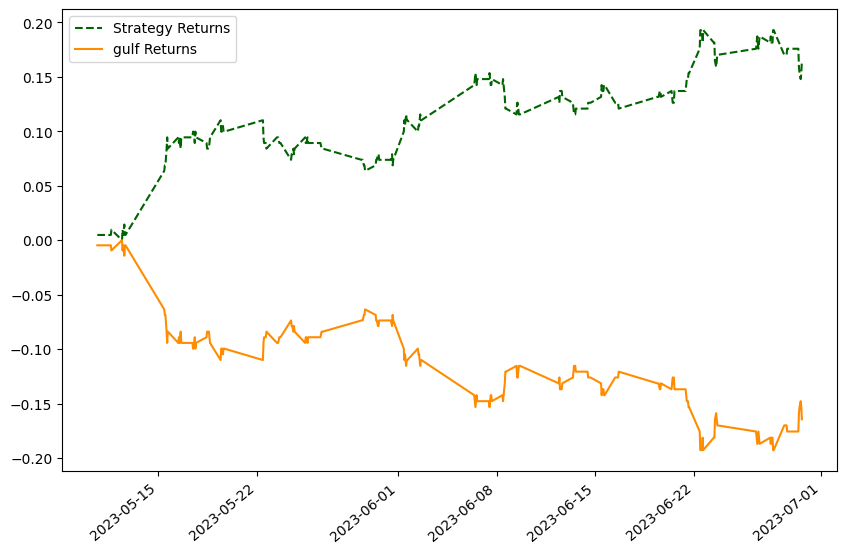

In [51]:
df['Predicted_Signal'] = model.predict(X)
df['gulf_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_gulf_returns = np.cumsum(df[split:]['gulf_returns'])

df['Strategy_returns'] = df['gulf_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

plt.figure(figsize=(10,6))
plt.plot(Cumulative_Strategy_returns, color='darkgreen', label = 'Strategy Returns', linestyle='--')
plt.plot(Cumulative_gulf_returns, color='darkorange', label = 'gulf Returns')
plt.xticks(rotation=40, ha='right')
plt.legend()
plt.show()